In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [31]:
!dir


 Volume in drive C has no label.
 Volume Serial Number is 3628-1990

 Directory of C:\Users\Praffulla\Desktop\Data Science\Regression

06/24/2019  05:05 PM    <DIR>          .
06/24/2019  05:05 PM    <DIR>          ..
06/24/2019  04:38 PM    <DIR>          .ipynb_checkpoints
06/21/2019  04:51 PM             1,257 brain.txt
06/24/2019  04:39 PM            23,873 diabetes_data.csv
06/21/2019  05:44 PM           254,353 EW-MAX.csv
06/21/2019  06:23 PM            20,167 Linear Regression_StockPrediction.ipynb
06/21/2019  05:42 PM            32,144 Linear_regression_manual_made_easy.ipynb
06/24/2019  05:05 PM           162,205 Logistic_diabetic.ipynb
06/21/2019  05:20 PM            93,653 Univarient_linear_regression_part1_brain.ipynb
               7 File(s)        587,652 bytes
               3 Dir(s)  150,386,069,504 bytes free


In [32]:
df1=pd.read_csv("diabetes_data.csv")

In [33]:
df1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [34]:
df1.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


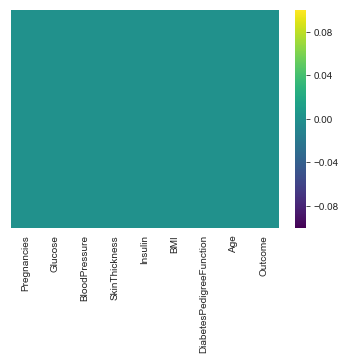

In [35]:
sns.heatmap(df1.isnull(),yticklabels=False,cmap='viridis')

In [36]:
#yticklabels=false means labels are only on x axis not y axis

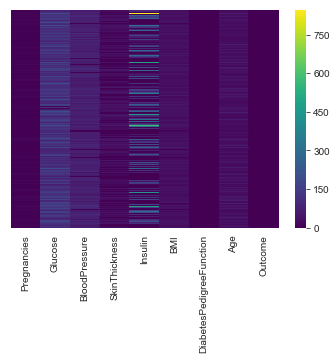

In [37]:
sns.heatmap(df1,yticklabels=False,cmap='viridis')

In [38]:
sns.set_style('whitegrid')

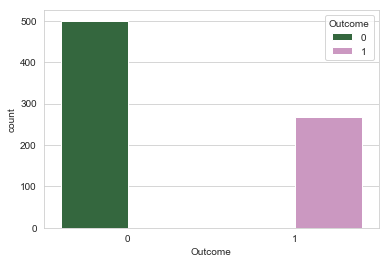

In [39]:
sns.countplot(x="Outcome",hue="Outcome",data=df1,palette='cubehelix')

### Outcome vs Age Distribution

Text(0.5, 0, 'Outcome')

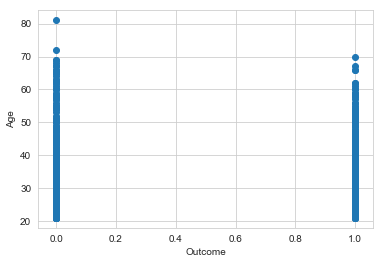

In [40]:
plt.scatter(x='Outcome',y='Age',data=df1)
plt.ylabel('Age')
plt.xlabel('Outcome')

In [41]:
# 70 ki uppar vale die at 70

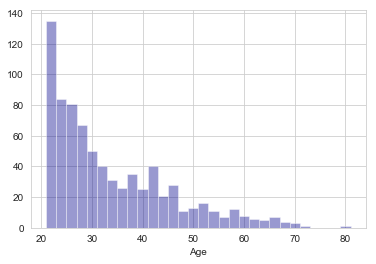

In [42]:
sns.distplot(df1['Age'],kde=False,color='darkblue',bins=30) #kde=gussian distribution if we do it true we will get a curve

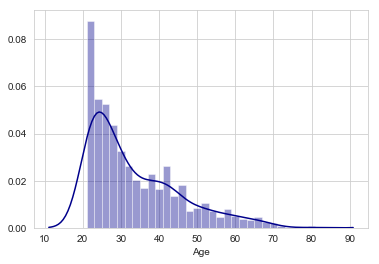

In [43]:
sns.distplot(df1['Age'],kde=True,color='darkblue',bins=30)

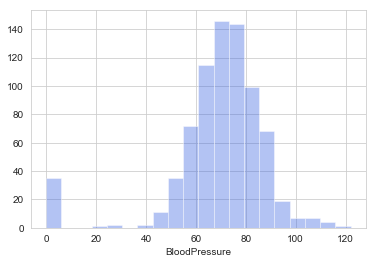

In [44]:
sns.distplot(df1['BloodPressure'],kde=False,color='royalblue',bins=20)

In [45]:
#0 is an outllier here

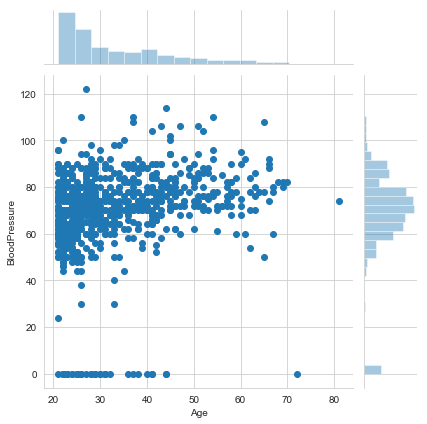

In [46]:
sns.jointplot(x='Age',y='BloodPressure',data=df1)

In [47]:
#we have data more of younger people rather than older people we get to knw about this fom the above graph

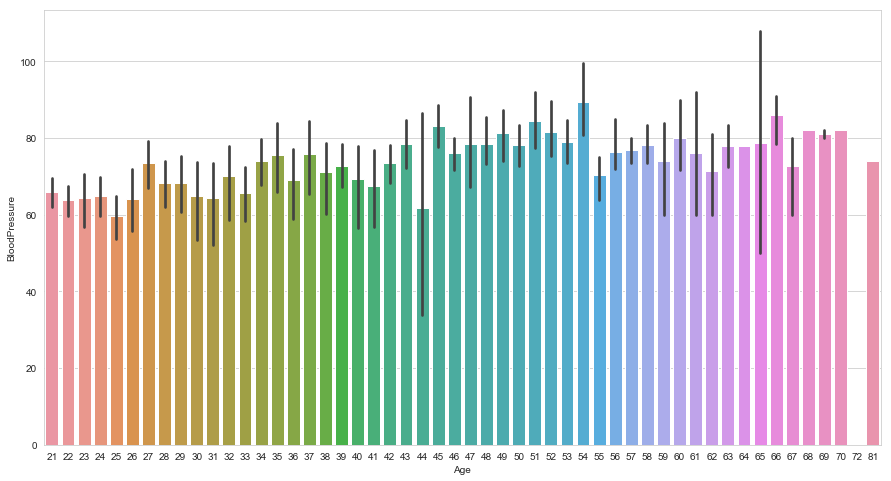

In [48]:
plt.figure(figsize=(15,8))
ax=sns.barplot(x='Age',y="BloodPressure",data=df1)

In [49]:
!pip install cufflinks

In [50]:
import cufflinks as cf
cf.go_offline()

In [51]:
#cufflink is a better version of seaborn genrates better graphs

In [52]:
df1['BMI'].iplot(kind='hist',bins=40,color='red')

In [53]:
#these are smart plot

In [54]:
x=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']

In [55]:
y=['Output']

In [58]:
df2=pd.DataFrame(data=df1)
df2.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Building the logistic REgression Model

In [67]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df1.drop('Outcome',axis=1),df1['Outcome'],test_size=0.20,random_state=101)

In [68]:
X_test.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
766,1,126,60,0,0,30.1,0.349,47
748,3,187,70,22,200,36.4,0.408,36
42,7,106,92,18,0,22.7,0.235,48
485,0,135,68,42,250,42.3,0.365,24
543,4,84,90,23,56,39.5,0.159,25


## Training and Predicting

In [69]:
from sklearn.linear_model import LogisticRegression

In [72]:
LRModel=LogisticRegression()

In [73]:
LRModel.fit(X_train,y_train)

C:\Program Files (x86)\New folder\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

## Testing out model

In [74]:
predictions_diabetes=LRModel.predict(X_test)

In [76]:
from sklearn.metrics import classification_report, confusion_matrix

In [78]:
print(classification_report(y_test,predictions_diabetes))

              precision    recall  f1-score   support

           0       0.83      0.86      0.85       103
           1       0.70      0.65      0.67        51

   micro avg       0.79      0.79      0.79       154
   macro avg       0.77      0.76      0.76       154
weighted avg       0.79      0.79      0.79       154



In [79]:
x=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
data=[1,130,126,60,30,30.1,0.349,47]
paitentid_54=pd.DataFrame([data],columns=x)
paitentid_54.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,1,130,126,60,30,30.1,0.349,47


In [80]:
predictions_diabetes=LRModel.predict(paitentid_54)

In [81]:
##predicting diabetes for the above created paiteient i.e. 54

In [82]:
print(predictions_diabetes)

[0]


In [84]:
# 0 mens diabetes nhi hogi(prediction can change also)

In [85]:
# our model is 79% accurate